### Importing proper headerfiles

In [ ]:
### Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ML Libraries:
## Preprocessing:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest,  chi2, f_classif, f_regression, mutual_info_regression
from sklearn.decomposition import PCA   ### dimensionality reduction

## Models:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Pipeline
from sklearn.pipeline import Pipeline

## Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Evalution:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc, confusion_matrix, classification_report

## Oversampling:
from imblearn.over_sampling import SMOTE

import xgboost 
from xgboost import XGBClassifier
import lightgbm 
from lightgbm import LGBMClassifier

## To save the final model:
import joblib

In [ ]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... |

**General Steps to follow::**

1. Define the problem: Clearly articulate the problem you want to solve using machine learning. Identify whether it is a classification, regression, clustering, or other types of tasks.

2. Preprocessing: Handle missing values, outliers, formatting, Label Encoding/One hot encoding

Feature Removal:
- Simple Correlation

3. Split the data: train_test_split

4. Feature Selection:
- Feature importance from tree-based models
- Feature selection --> statistical methods using SelectKBest
- Principal Component Analysis (PCA)

5. Choose candidate algorithms: Baseline models

6. Initial training and evaluation: Train each candidate algorithm on the training set and evaluate its performance on the testing set using appropriate metrics (e.g., accuracy, F1-score, mean squared error, etc.).

7. Hyperparameter tuning: Grid Search/ Randomised Search

8. Model comparison: Compare the performance of each algorithm based on the evaluation metrics. Consider factors such as accuracy, interpretability, training time, and ease of implementation.

9. Fine-tuning: If necessary, fine-tune the top-performing algorithms by making further adjustments to hyperparameters or exploring different feature sets.

10. Ensemble methods: bagging, boosting, or stacking

11. Final evaluation: Evaluate the top-performing models using k-fold cross-validation to obtain a more robust estimate of their performance.

12. Select the best algorithm: Based on the evaluation results, choose the algorithm that performs the best on the validation set or cross-validation.

13. Test on unseen data: Once you have selected the best algorithm, test it on completely unseen data to ensure its generalization to new samples.

### Summarising and Preprocessing the data:

In [ ]:
### import the data set
df=pd.read_csv("/Data/CreditDefaultData/default_of_credit_card_clients.csv", header=1)
df.head()

In [ ]:
df.shape

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [95]:
### checking missing values
df.isnull().sum().sum()

0

In [96]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [97]:
df.drop(['ID'],axis=1,inplace=True)

In [98]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

### Feature Removal

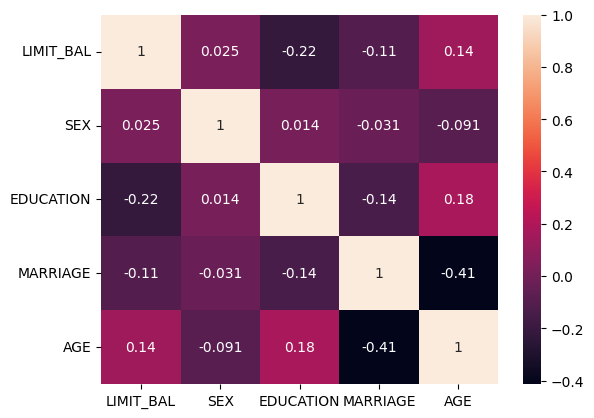

In [100]:
### checking for Collinearity:::
sample = df[df.columns[:5]]
corr_matrix1=sample.corr()
sns.heatmap(corr_matrix1,annot=True)
plt.show()

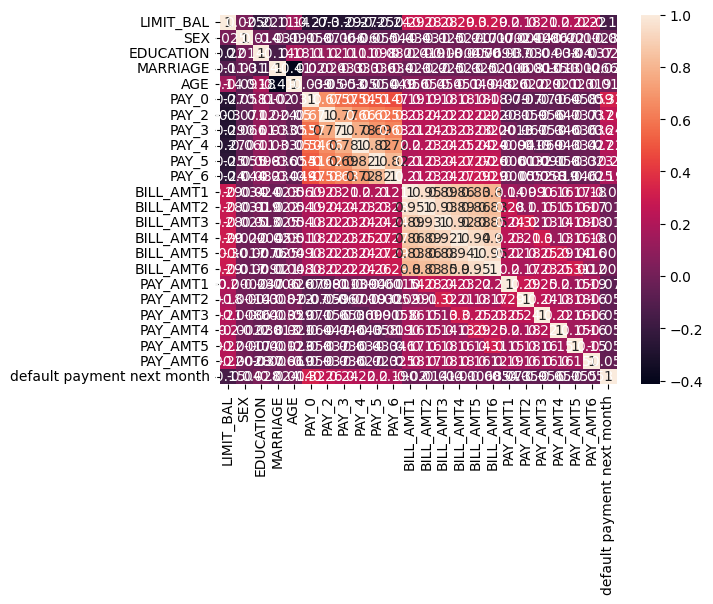

In [101]:
### checking for Collinearity:::
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [102]:
### Dropping the highly correlated variables
correlated_features = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  ### Custom threshold - Correlation Coefficient
            colname = corr_matrix.columns[i]
            correlated_features[colname]=corr_matrix.iloc[i, j]

correlated_features

{'PAY_3': 0.7665516829341017,
 'PAY_4': 0.7773588733012726,
 'PAY_5': 0.8198353114868158,
 'PAY_6': 0.8169001604176753,
 'BILL_AMT2': 0.9514836727518136,
 'BILL_AMT3': 0.9283262592714855,
 'BILL_AMT4': 0.9239694565909823,
 'BILL_AMT5': 0.9401344040880004,
 'BILL_AMT6': 0.9461968070521957}

In [103]:
correlated_features.keys()

dict_keys(['PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

In [104]:
df.shape

(30000, 24)

### Splitting:

In [105]:
### Split the data::
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [106]:
### Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [107]:
X_train.shape,X_test.shape

((24000, 23), (6000, 23))

### Scaling:

In [108]:
### Standard Scaling for the features::
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.67235902,  0.80815856,  0.18430622, ..., -0.22465419,
        -0.21600791, -0.24524018],
       [-1.05776818, -1.23738094,  0.18430622, ..., -0.24078483,
        -0.30852284, -0.29553162],
       [ 0.0984593 ,  0.80815856,  3.97142033, ...,  0.12267581,
         0.35348711, -0.28510675],
       ...,
       [-0.90360452, -1.23738094, -1.07806515, ..., -0.29935805,
        -0.30852284, -0.29553162],
       [-0.74944086,  0.80815856,  0.18430622, ..., -0.22575819,
        -0.30852284, -0.22679617],
       [-0.05570437,  0.80815856,  0.18430622, ..., -0.19815824,
         0.60062042, -0.20961231]])

### Trying Oversampling technique for the same data


In [109]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)
X_over,y_over

(array([[-0.67235902,  0.80815856,  0.18430622, ..., -0.22465419,
         -0.21600791, -0.24524018],
        [-1.05776818, -1.23738094,  0.18430622, ..., -0.24078483,
         -0.30852284, -0.29553162],
        [ 0.0984593 ,  0.80815856,  3.97142033, ...,  0.12267581,
          0.35348711, -0.28510675],
        ...,
        [-1.17936546, -1.23738094,  1.44667759, ..., -0.26670608,
         -0.21993783, -0.26556698],
        [ 0.14856566,  0.80815856, -1.07806515, ..., -0.29935805,
         -0.30852284, -0.22207742],
        [ 1.7457524 , -1.23738094, -1.07806515, ..., -0.28251336,
         -0.22565496, -0.29195138]]),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 37349    1
 37350    1
 37351    1
 37352    1
 37353    1
 Name: default payment next month, Length: 37354, dtype: int64)

In [110]:
y_over.value_counts()

0    18677
1    18677
Name: default payment next month, dtype: int64

### Base line Modelling


In [111]:
### Baseline modelling for trianing set
%%time
model=[SVC(),LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), RidgeClassifier(), Lasso(), KNeighborsClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_train,y_train,cv=5,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

CPU times: user 2min 49s, sys: 1.54 s, total: 2min 50s
Wall time: 3min 4s


In [112]:
dict_model_results

{'SVC()': 0.81975,
 'LogisticRegression()': 0.8099583333333333,
 'DecisionTreeClassifier()': 0.7282916666666667,
 'RandomForestClassifier()': 0.8170833333333333,
 'RidgeClassifier()': 0.7998749999999999,
 'Lasso()': nan,
 'KNeighborsClassifier()': 0.7909583333333333}

In [113]:
### Baseline modelling for Oversampling set
%%time
model=[SVC(),LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), RidgeClassifier(), Lasso(), KNeighborsClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_over,y_over,cv=5,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

CPU times: user 6min 38s, sys: 1.94 s, total: 6min 40s
Wall time: 6min 37s


In [114]:
dict_model_results

{'SVC()': 0.7175402506828277,
 'LogisticRegression()': 0.6724848799561787,
 'DecisionTreeClassifier()': 0.7673885261296827,
 'RandomForestClassifier()': 0.8604443132813232,
 'RidgeClassifier()': 0.6724580130184774,
 'Lasso()': nan,
 'KNeighborsClassifier()': 0.7888044678602869}

### Evaluating best baseline model

In [115]:
### Training the model using Randomforest for training set

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
### Predicting with the test set

y_pred = model.predict(X_test)


In [117]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.815333,0.637216,0.362529,0.462136,0.652355


In [118]:
### Training the model using Randomforest for over_sampling set

model = RandomForestClassifier()
model.fit(X_over,y_over)

RandomForestClassifier()

In [119]:
### Predicting with the test set

y_pred = model.predict(X_test)

In [120]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.796333,0.539394,0.474486,0.504862,0.68049


### Hyper Parameter tuning of the best baseline model

In [121]:
### We perform RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

rf_Model = RandomForestClassifier()

rf_Random = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

rf_Random.fit(X_train, y_train)

rf_Random.best_params_

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 50,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 9,
 'bootstrap': True}

In [122]:
### Training the model using Randomforest after tuning the parameters

model = RandomForestClassifier(**rf_Random.best_params_)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50)

In [123]:
### Predicting with the test set

y_pred = model.predict(X_test)

In [124]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.819667,0.670103,0.346535,0.456827,0.649371


### Checking with other ensemble models

In [125]:
### for the training set data
%%time
model=[XGBClassifier(), LGBMClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_train,y_train,cv=5,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

dict_model_results

CPU times: user 57.1 s, sys: 156 ms, total: 57.3 s
Wall time: 37.6 s


{'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, ...)': 0.8136666666666666,
 'LGBMClassifier()': 0.8195416666666666}

In [126]:
### for the oversampling set data
%%time
model=[XGBClassifier(), LGBMClassifier()]
dict_model_results={}
for i in model:
  acc_score=cross_val_score(i,X_over,y_over,cv=5,scoring='accuracy')
  dict_model_results[str(i)]=np.array(acc_score).mean()

dict_model_results

CPU times: user 1min 36s, sys: 180 ms, total: 1min 36s
Wall time: 56.4 s


{'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=None, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=None, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, ...)': 0.8545292901405291,
 'LGBMClassifier()': 0.852869266742605}

### Hyper parameter tuning for LGBM method

In [127]:
from numpy.random.mtrand import random
### Performing RandomizedSearchCv

# Create a LightGBM classifier
lgb_model = LGBMClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'bagging_fraction': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(lgb_model, param_grid, cv=5)

# Fit the grid search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = random_search.best_params_

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

In [128]:
best_params

{'reg_lambda': 1.0,
 'reg_alpha': 0.5,
 'n_estimators': 100,
 'min_child_samples': 20,
 'max_depth': 3,
 'learning_rate': 0.1,
 'feature_fraction': 0.6,
 'bagging_fraction': 1.0}

In [129]:
### Training the model with these hyper parameters

### Training the model using Randomforest after tuning the parameters

model = LGBMClassifier(**best_params)
model.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.6, max_depth=3,
               reg_alpha=0.5, reg_lambda=1.0)

In [130]:
y_pred = model.predict(X_test)

In [131]:
### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['LightBGM Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,LightBGM Tuned,0.82,0.666191,0.355674,0.463754,0.652874


### Evaluation of the best model


In [132]:
### Training the model using Randomforest after tuning the parameters

modelRF = RandomForestClassifier(**rf_Random.best_params_)
modelRF.fit(X_train,y_train)

### Predicting with the test set

y_pred = modelRF.predict(X_test)

### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(model_results)

filename = '/content/drive/MyDrive/Data_Projects/Credit_risk_baseline.sav'
joblib.dump(modelRF, filename)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


                 Model  Accuracy  Precision    Recall  F1 Score      ROC
0  Random Forest Tuned  0.817833   0.658046  0.348819  0.455948  0.64902


['/content/drive/MyDrive/Data_Projects/Credit_risk_baseline.sav']

In [133]:
### LightBGM

modelLGBM = LGBMClassifier(**best_params)
modelLGBM.fit(X_train,y_train)

y_pred = modelLGBM.predict(X_test)

### Finding the accuracy for the same
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results =  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(model_results)

filename = '/content/drive/MyDrive/Data_Projects/Credit_risk_ensemble.sav'
joblib.dump(modelLGBM, filename)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
                 Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Random Forest Tuned      0.82   0.666191  0.355674  0.463754  0.652874


['/content/drive/MyDrive/Data_Projects/Credit_risk_ensemble.sav']

### Plotting final curves

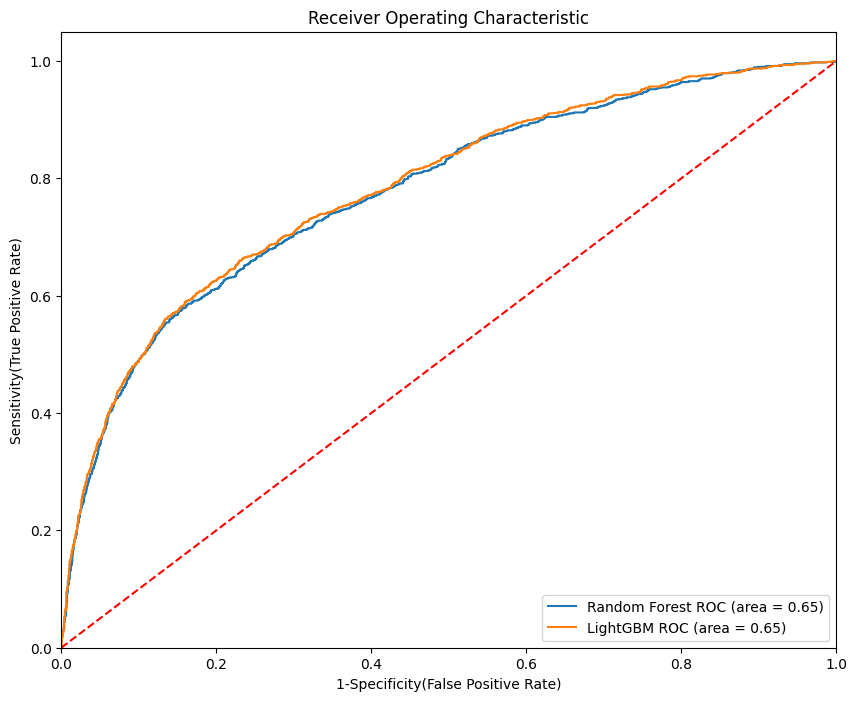

In [134]:
filename1 = '/content/drive/MyDrive/Data_Projects/Credit_risk_baseline.sav'
loaded_model_baseline = joblib.load(filename1)

filename2 = '/content/drive/MyDrive/Data_Projects/Credit_risk_ensemble.sav'
loaded_model_ensemble = joblib.load(filename2)

y_pred_baseline =loaded_model_baseline.predict_proba(X_test)[:,1]
y_pred_ensemble =loaded_model_ensemble.predict_proba(X_test)[:,1]


model = [loaded_model_baseline, loaded_model_ensemble]

models=[y_pred_baseline,y_pred_ensemble]
label=['Random Forest', 'LightGBM']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(2)
for m in m:
    fpr, tpr,thresholds= roc_curve(y_test,models[m])
    auc = roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [135]:
### confusion matrix
y_pred_baseline = loaded_model_baseline.predict(X_test)
y_pred_ensemble = loaded_model_ensemble.predict(X_test)

<Axes: >

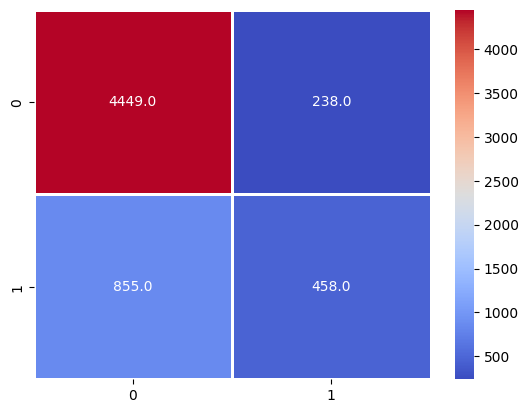

In [136]:
cm = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm', fmt=".1f")

<Axes: >

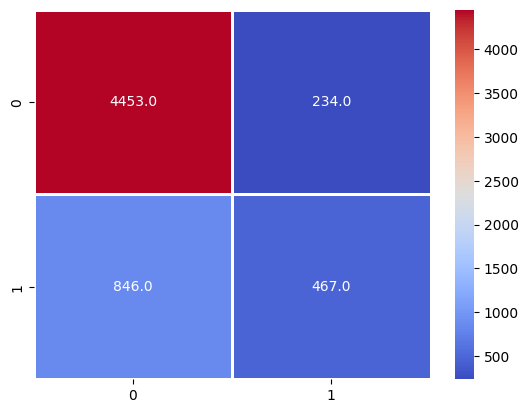

In [137]:
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm', fmt=".1f")

In [138]:
### Classification report for both models

print(classification_report(y_test, y_pred_ensemble, digits=4))
print(classification_report(y_test, y_pred_baseline, digits=4))

              precision    recall  f1-score   support

           0     0.8403    0.9501    0.8918      4687
           1     0.6662    0.3557    0.4638      1313

    accuracy                         0.8200      6000
   macro avg     0.7533    0.6529    0.6778      6000
weighted avg     0.8022    0.8200    0.7982      6000

              precision    recall  f1-score   support

           0     0.8388    0.9492    0.8906      4687
           1     0.6580    0.3488    0.4559      1313

    accuracy                         0.8178      6000
   macro avg     0.7484    0.6490    0.6733      6000
weighted avg     0.7992    0.8178    0.7955      6000

